<a href="https://colab.research.google.com/github/HelithaNimnaka/EN3160_Image_Processing/blob/main/Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


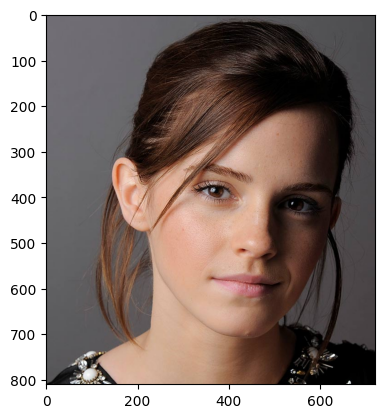

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load and display the image from its path
img_path = '/content/drive/MyDrive/Photos/emma.jpg'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()


51
0
100
0
105
256


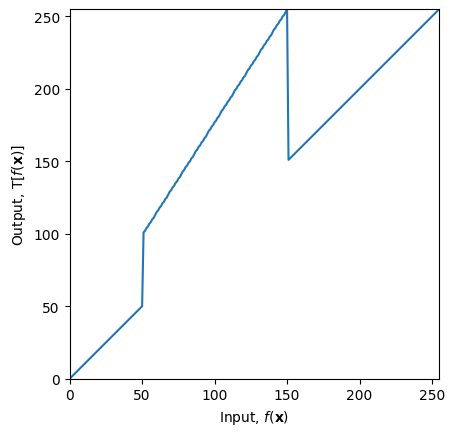

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


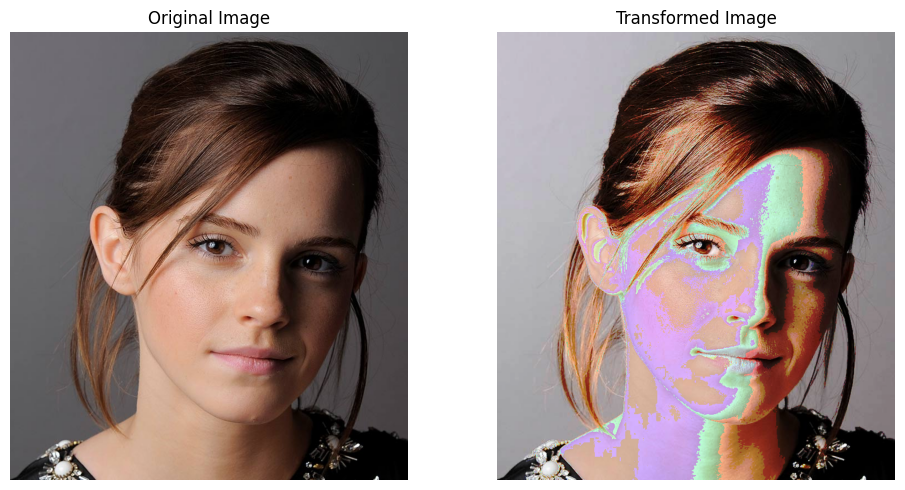

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import cv2 as cv


# Define a matrix to determine the transformation
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Create the first linear transformation
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')
print(len(t1))  # Print the length of t1

# Create the second linear transformation
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
print(len(t2))  # Print the length of t2

# Create the third linear transformation
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
print(len(t3))  # Print the length of t3

# Create the fourth linear transformation
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
print(len(t4))  # Print the length of t4

# Create the fifth linear transformation
t5 = np.linspace(c[3, 1] + 1, 255, 255 - c[3, 0]).astype('uint8')
print(len(t5))  # Print the length of t5

# Concatenate the five transformations to create the final 'transform' array
transform = np.concatenate((t1, t2, t3, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))  # Print the length of the final transform

# Visualize the transformation using a plot
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')  # Save the plot as an image
plt.show()

# Mount Google Drive
drive.mount('/content/drive')

# Load the grayscale image using Matplotlib
img_path = '/content/drive/MyDrive/Photos/emma.jpg'
img_orig = plt.imread(img_path)

# Apply the defined transformation to the original image
image_transformed = np.take(transform, img_orig)

# Create a side-by-side comparison of original and transformed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the transformed image in the second subplot
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title("Transformed Image")
axes[1].axis('off')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()